***Indian Startup Ecosystem Analysis (2016-2024)***

---
       -by Varshith S Mendon

>*The dataset contains real time data of different startup industries recognition across different states in india during the period of 2016-2024. the dataset was sourced from the dataful.in .*

In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install plotly

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import zscore

In [3]:
df = pd.read_csv('/content/drive/MyDrive/DATASETS/year-state-and-industry-wise-number-of-startups-recognized-by-the-dpiit-as-of-june-2025.csv')
df.head()

,year,state,industry,startups_recognized,unit,note
0,2024,Assam,Advertising,1,startups_recognized in absolute numbers,startups_recognized: Data as of 01 June 2025
1,2024,Assam,Architecture Interior Design,1,startups_recognized in absolute numbers,startups_recognized: Data as of 01 June 2025
2,2024,Assam,Automotive,3,startups_recognized in absolute numbers,startups_recognized: Data as of 01 June 2025
3,2024,Assam,Chemicals,3,startups_recognized in absolute numbers,startups_recognized: Data as of 01 June 2025
4,2024,Assam,Telecommunication & Networking,2,startups_recognized in absolute numbers,startups_recognized: Data as of 01 June 2025


In [4]:
df.isnull().sum()

,0
year,0
state,0
industry,0
startups_recognized,0
unit,0
note,0


In [5]:
duplicates= df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [year, state, industry, startups_recognized, unit, note]
Index: []


In [6]:
df.dtypes

,0
year,int64
state,object
industry,object
startups_recognized,int64
unit,object
note,object


In [7]:
print(df.nunique())

year                     9
state                   36
industry                56
startups_recognized    251
unit                     1
note                     1
dtype: int64


>*After processing, it was found that the dataset contains no null values or duplicate records, indicating that the data is clean and ready for analysis.*

## **Exploratory Data Analysis**

# Total number of Different Startups recognised in india

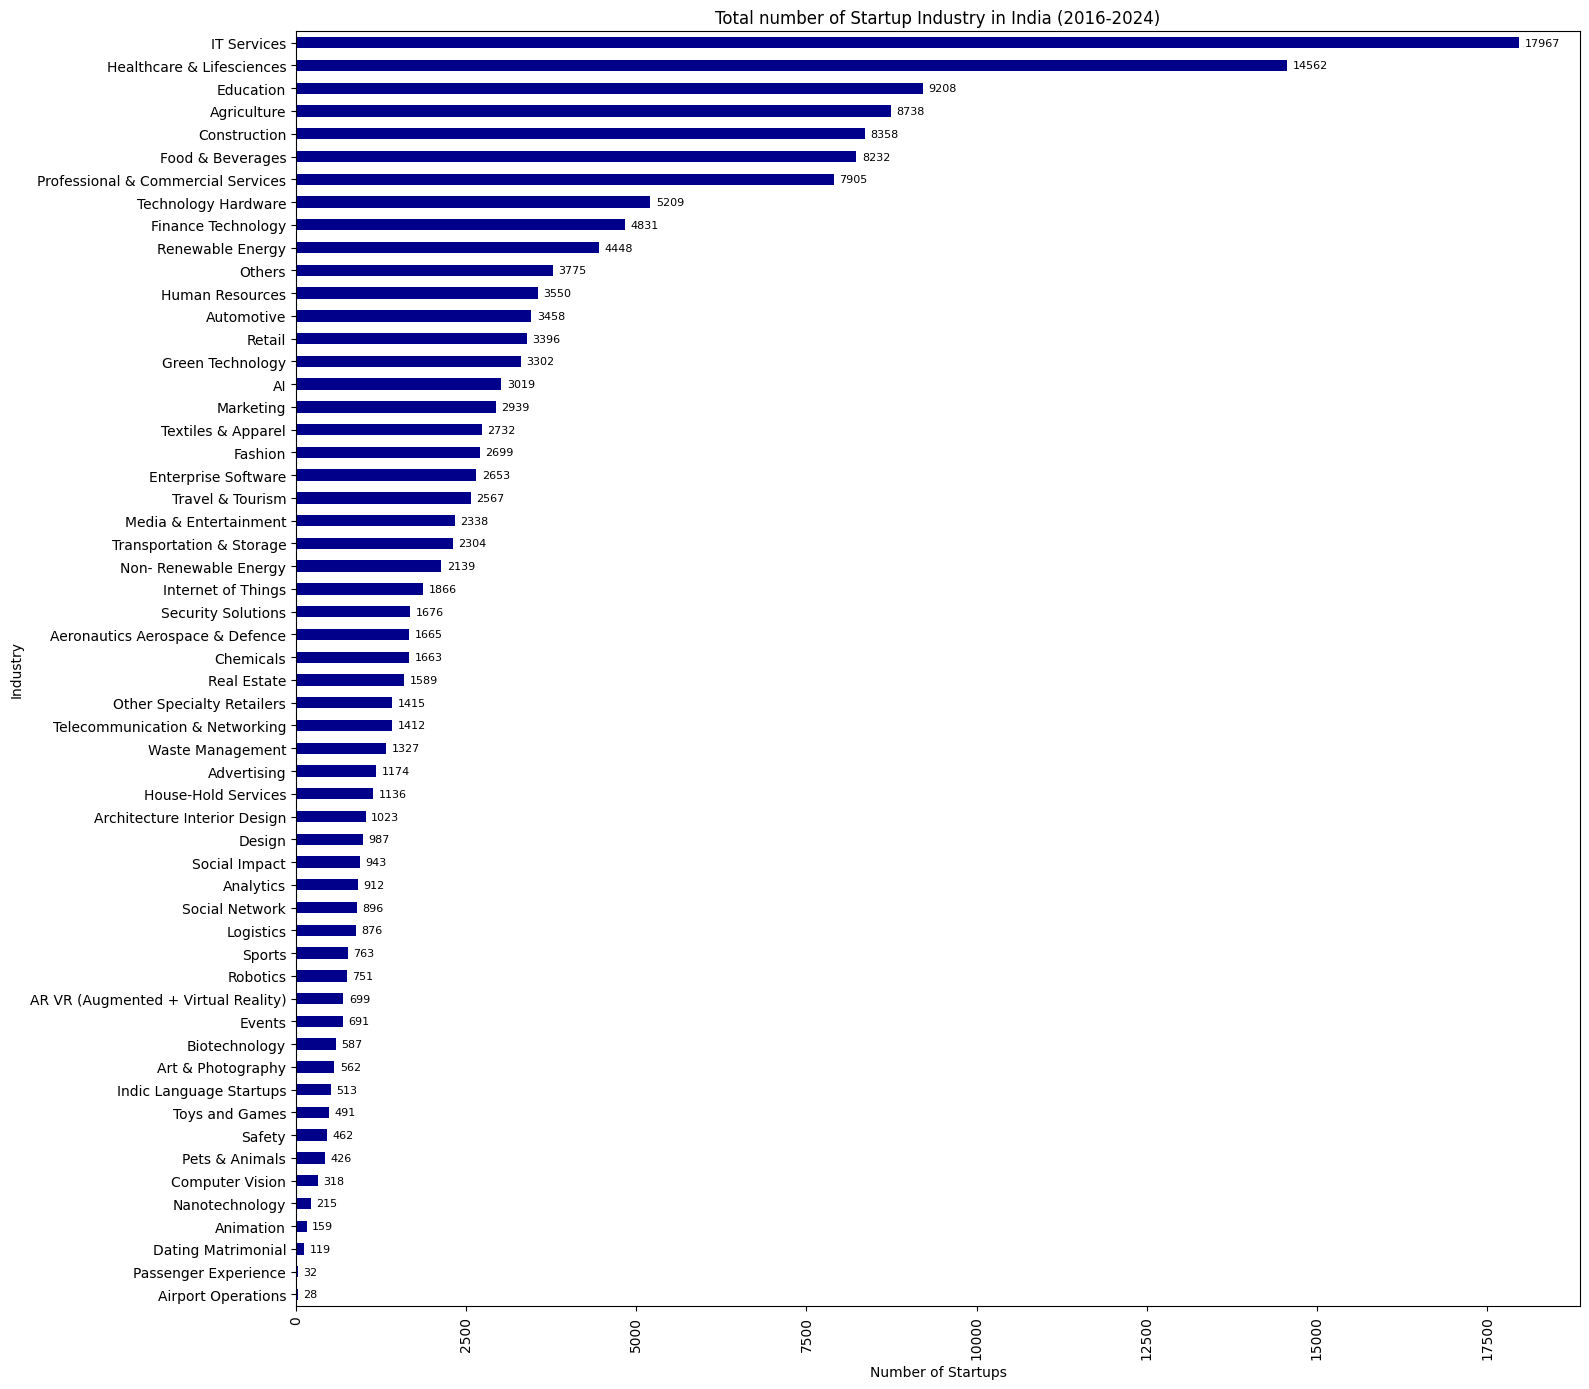

In [8]:
industry_total = df.groupby('industry')['startups_recognized'].sum().sort_values(ascending=True)
plt.figure(figsize=(16,14))
ax = industry_total.plot(kind='barh', color='darkblue')


for i in ax.containers:
    ax.bar_label(i, padding=4, fontsize=8)

plt.title('Total number of Startup Industry in India (2016-2024)')
plt.xlabel('Number of Startups')
plt.ylabel('Industry')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


>*The Indian startup ecosystem from 2016 to 2024 has been dominated by IT Services and Healthcare & Lifesciences sectors. these two industries alone account for the highest cumulative startup recognitions, indicating a strong digital and health focused entrepreneurial trend across the country.*

**Top startup industries Trends over the years**

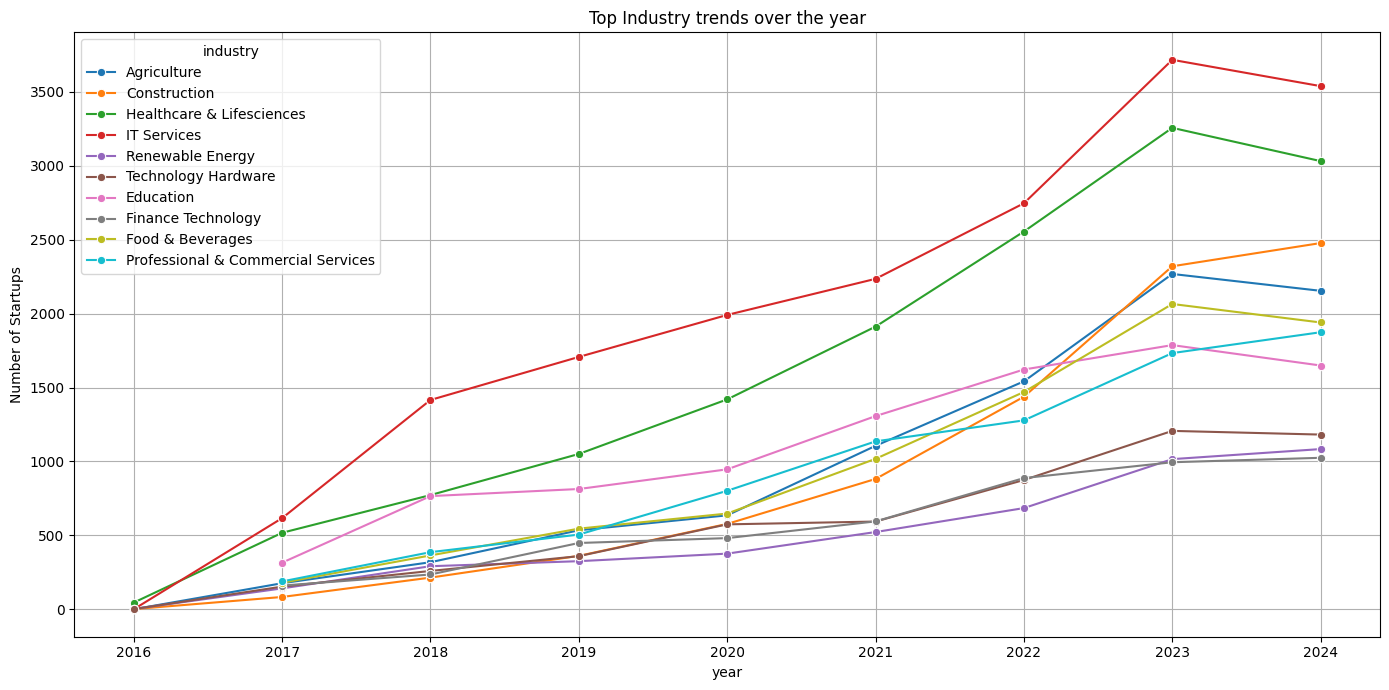

In [9]:
top_industry = df.groupby('industry')['startups_recognized'].sum().sort_values(ascending=False).head(10).index.tolist()

df_top10 = df[df['industry'].isin(top_industry)]

trend_data = (df_top10.groupby(['year','industry'])['startups_recognized'].sum().reset_index())

plt.figure(figsize=(14,7))
sns.lineplot(data=trend_data, x='year', y='startups_recognized', hue='industry', marker='o')
plt.title('Top Industry trends over the year')
plt.ylabel('Number of Startups')
plt.grid(True)
plt.tight_layout()
plt.show()

>*From 2016 to 2024, IT services and Healthcare & Lifesciences have consistently let the Indian startup landscape, showcasing dominant and sustained growth.*

>*Post-2022, a notable surge in Agriculture and Construction startups is observed, indicating a new wave of growth in infrastructure and agritech sectors after 2022.*


>*Interestingly, Education startups, Which experienced strong momentum during pandemic shows a declining trend post covid, possibly due to saturation or shifting market dynamics in EdTech.*

# Top 10 states with highest number of recognized startups

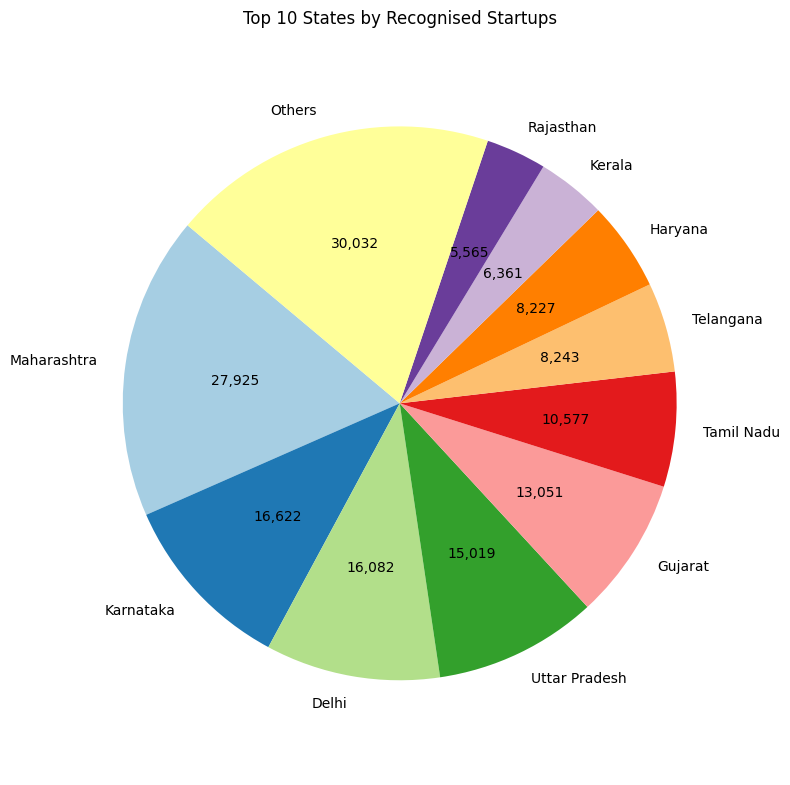

In [10]:
state_totals = df.groupby('state')['startups_recognized'].sum().sort_values(ascending=False)
top_10 = state_totals.head(10)
others_total = state_totals.iloc[10:].sum()

final_data = top_10.copy()
final_data['Others'] = others_total

def show_actual_values(pct, all_vals):
    total = sum(all_vals)
    absolute = int(pct / 100 * total)
    return f"{absolute:,}"

plt.figure(figsize=(8, 8))
plt.pie(
    final_data,
    labels=final_data.index,
    autopct=lambda pct: show_actual_values(pct, final_data),
    startangle=140,
    colors=plt.cm.Paired.colors
)

plt.title('Top 10 States by Recognised Startups')
plt.axis('equal')
plt.tight_layout()
plt.show()


>*Maharastra and Karnataka are the leading startup hubs in India likely due to the presence of Mumbai and Bengaluru, which are financial and tech capital of India.*

>*Delhi and Uttar Pradesh also contribute significantly showing north India'sstrong startup presence.*

Annual Startup Recognition in Top 10 States

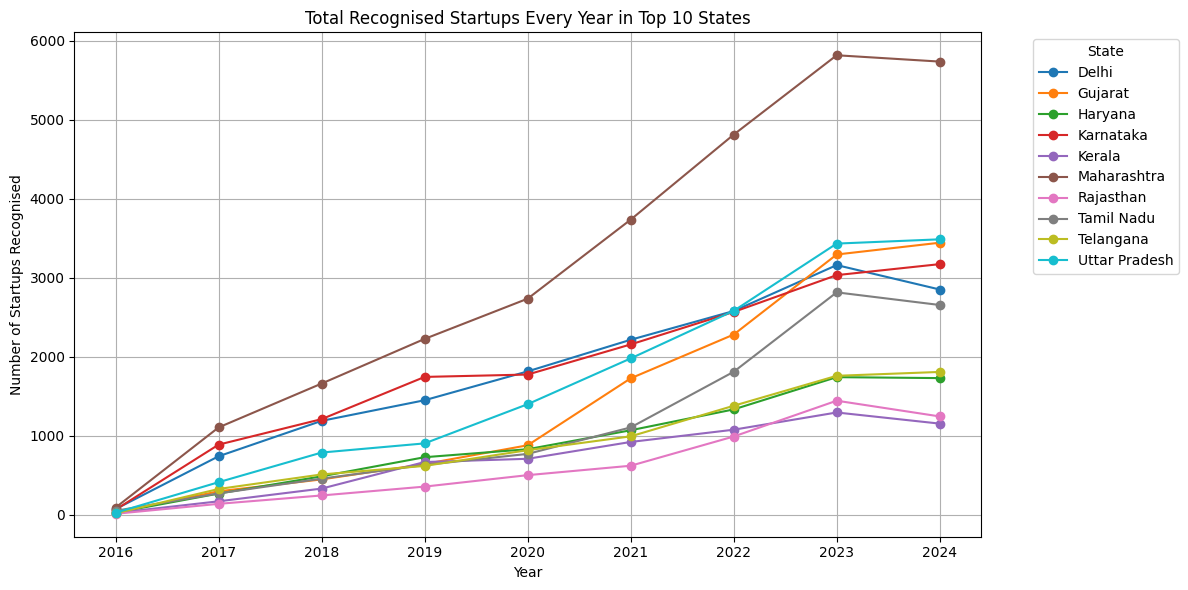

In [22]:
grouped = df.groupby(['state', 'year'])['startups_recognized'].sum().reset_index()

top_10_states = (grouped.groupby('state')['startups_recognized'].sum().sort_values(ascending=False).head(10).index)
top_grouped = grouped[grouped['state'].isin(top_10_states)]
pivot_df = top_grouped.pivot(index='year', columns='state', values='startups_recognized').fillna(0)

plt.figure(figsize=(12, 6))
for state in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[state], marker='o', label=state)

plt.title('Total Recognised Startups Every Year in Top 10 States')
plt.xlabel('Year')
plt.ylabel('Number of Startups Recognised')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(pivot_df.index)
plt.grid(True)
plt.tight_layout()

plt.show()


>*A sharp rise in recognized startups in Gujarat post-2020 can be directly linked to the launch of the Gujarat Industrial Policy 2020, which provided targeted support through subsidies and startup-friendly reforms.*

>*Karnataka despite being home to Bengaluru a major tech hub, the state shows slowdown in startup recognition post 2020, this could indicate market saturation and startup migration to other states.*

>*Maharashtra continues to lead in total recognized startups due to Mumbais financial ecosystem and Pune's tech corridor.*

>*Other states show consistent growth, highlighting decentralization of startups and their trajectories imply founders are increasingly leveraging local resources and state incentives to build startups in diverse geographies.*

# Top 10 states and their highest performing Industries

**Top 10 Industries in Maharastra**

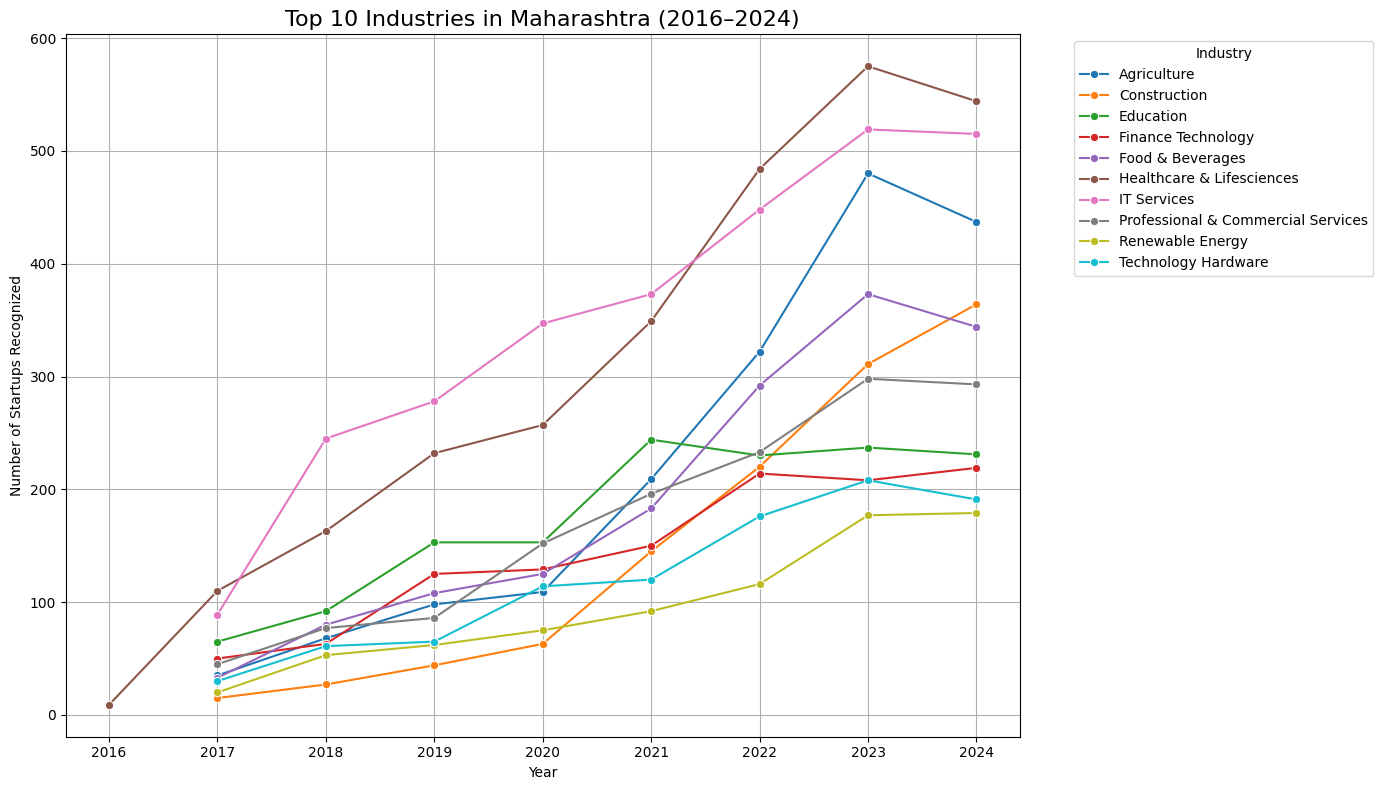

In [11]:
maharastradf = df[df['state'] == 'Maharashtra']
top_industries = (maharastradf.groupby('industry')['startups_recognized'].sum().nlargest(10).index)
top_industry_data = maharastradf[maharastradf['industry'].isin(top_industries)]

grouped = top_industry_data.groupby(['industry', 'year'])['startups_recognized'].sum().reset_index()

plt.figure(figsize=(14, 8))
sns.lineplot(data=grouped, x='year', y='startups_recognized', hue='industry', marker='o')
plt.title('Top 10 Industries in Maharashtra (2016–2024)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of Startups Recognized')
plt.xticks(grouped['year'].unique())
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

**Top 10 Industries in Karnataka**

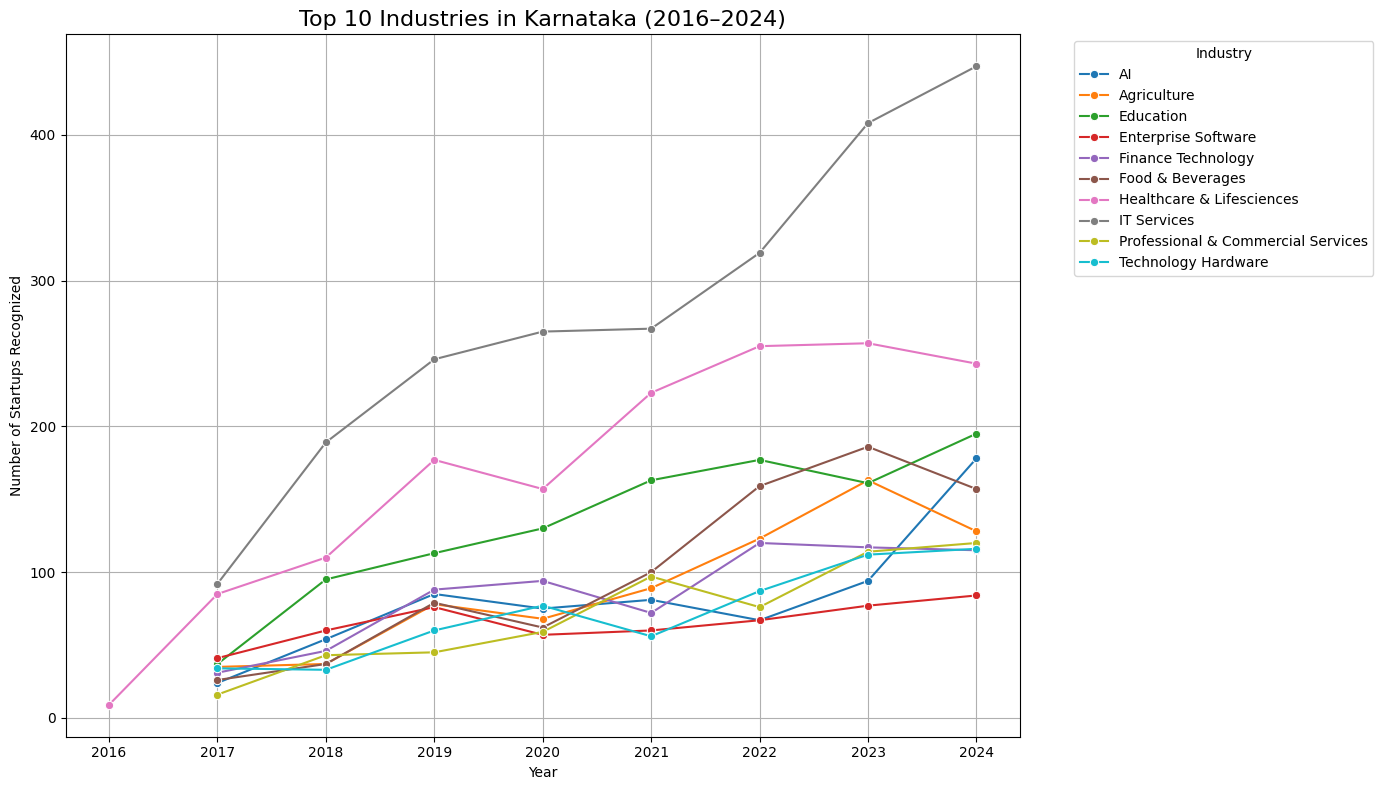

In [12]:
karnatakadf = df[df['state'] == 'Karnataka']
top_industries = (karnatakadf.groupby('industry')['startups_recognized'].sum().nlargest(10).index)
top_industry_data = karnatakadf[karnatakadf['industry'].isin(top_industries)]

grouped = top_industry_data.groupby(['industry', 'year'])['startups_recognized'].sum().reset_index()

plt.figure(figsize=(14, 8))
sns.lineplot(data=grouped, x='year', y='startups_recognized', hue='industry', marker='o')
plt.title('Top 10 Industries in Karnataka (2016–2024)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of Startups Recognized')
plt.xticks(grouped['year'].unique())
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

**Top 10 Industries in Delhi**

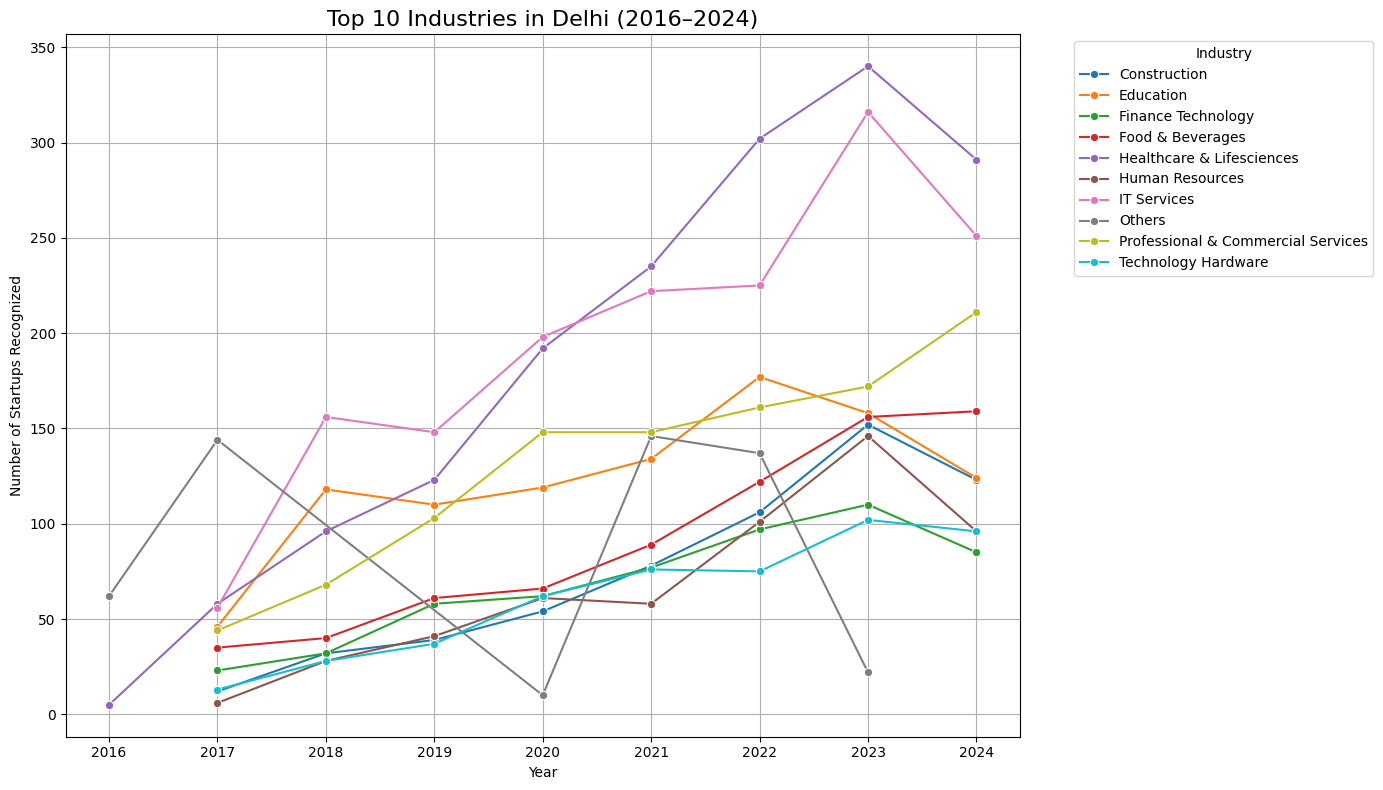

In [13]:
delhidf = df[df['state'] == 'Delhi']
top_industries = (delhidf.groupby('industry')['startups_recognized'].sum().nlargest(10).index)
top_industry_data = delhidf[delhidf['industry'].isin(top_industries)]

grouped = top_industry_data.groupby(['industry', 'year'])['startups_recognized'].sum().reset_index()

plt.figure(figsize=(14, 8))
sns.lineplot(data=grouped, x='year', y='startups_recognized', hue='industry', marker='o')
plt.title('Top 10 Industries in Delhi (2016–2024)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of Startups Recognized')
plt.xticks(grouped['year'].unique())
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

**Top 10 Industries in Uttar Pradesh**

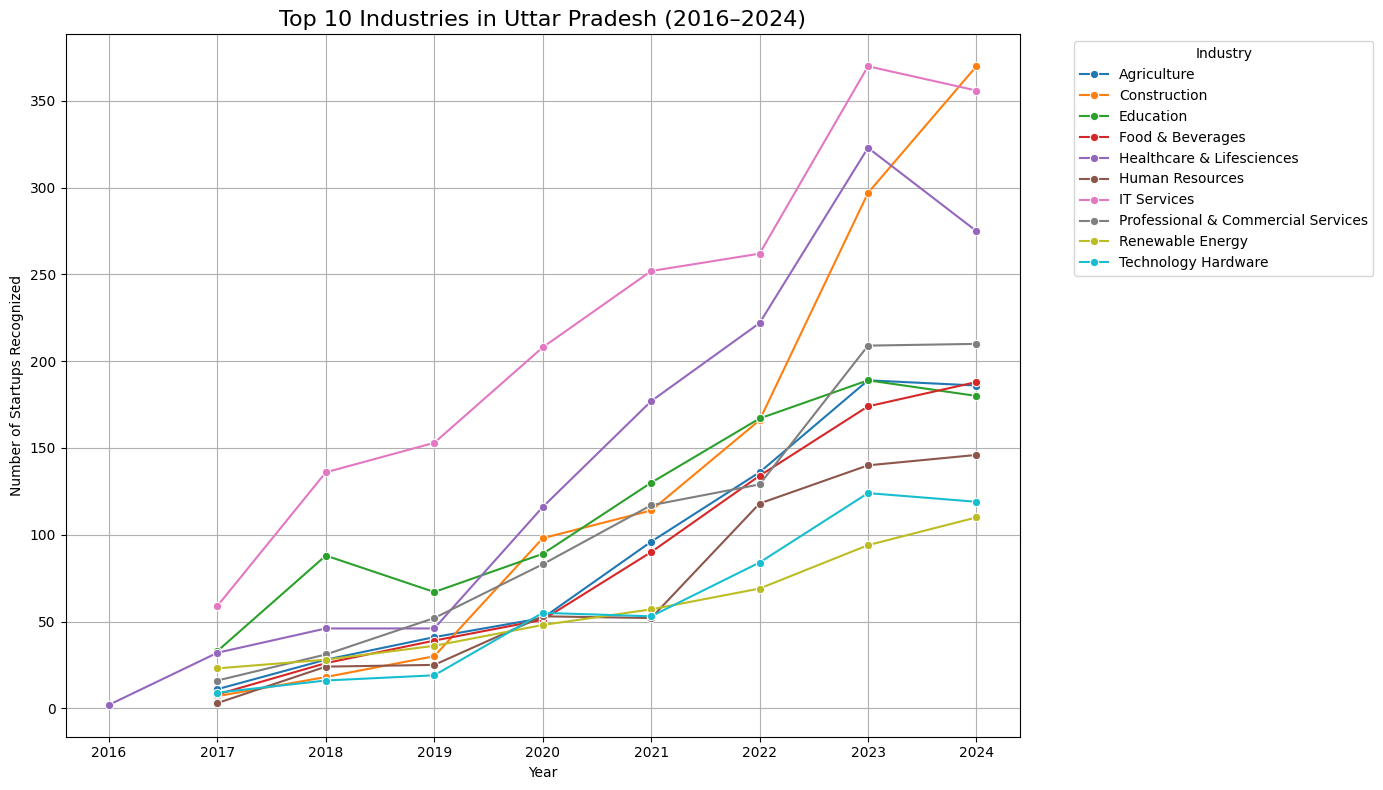

In [14]:
updf = df[df['state'] == 'Uttar Pradesh']
top_industries = (updf.groupby('industry')['startups_recognized'].sum().nlargest(10).index)
top_industry_data = updf[updf['industry'].isin(top_industries)]

grouped = top_industry_data.groupby(['industry', 'year'])['startups_recognized'].sum().reset_index()

plt.figure(figsize=(14, 8))
sns.lineplot(data=grouped, x='year', y='startups_recognized', hue='industry', marker='o')
plt.title('Top 10 Industries in Uttar Pradesh (2016–2024)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of Startups Recognized')
plt.xticks(grouped['year'].unique())
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

**Top 10 Industries in Gujarat**

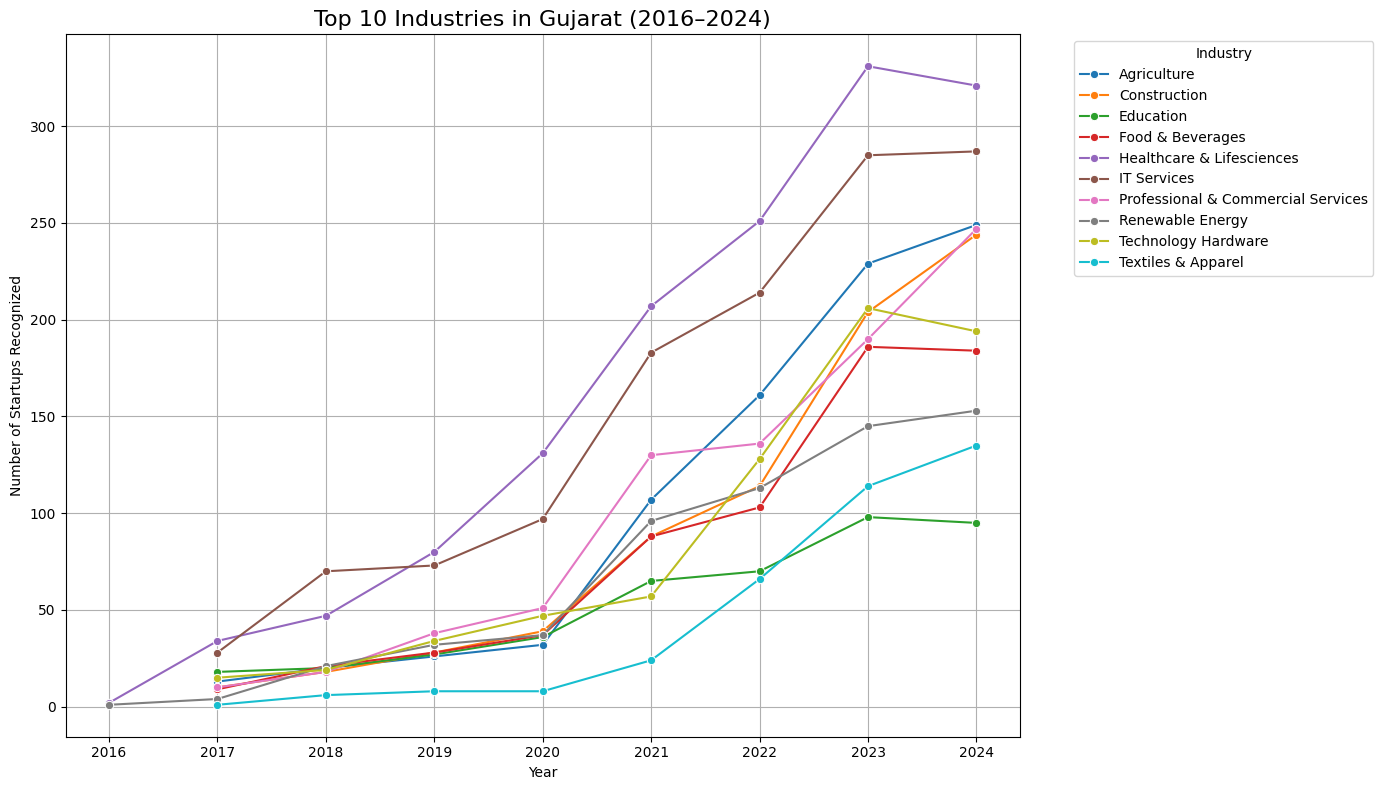

In [15]:
GJdf = df[df['state'] == 'Gujarat']
top_industries = (GJdf.groupby('industry')['startups_recognized'].sum().nlargest(10).index)
top_industry_data = GJdf[GJdf['industry'].isin(top_industries)]

grouped = top_industry_data.groupby(['industry', 'year'])['startups_recognized'].sum().reset_index()

plt.figure(figsize=(14, 8))
sns.lineplot(data=grouped, x='year', y='startups_recognized', hue='industry', marker='o')
plt.title('Top 10 Industries in Gujarat (2016–2024)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of Startups Recognized')
plt.xticks(grouped['year'].unique())
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

**Top 10 Industries in Tamil Nadu**

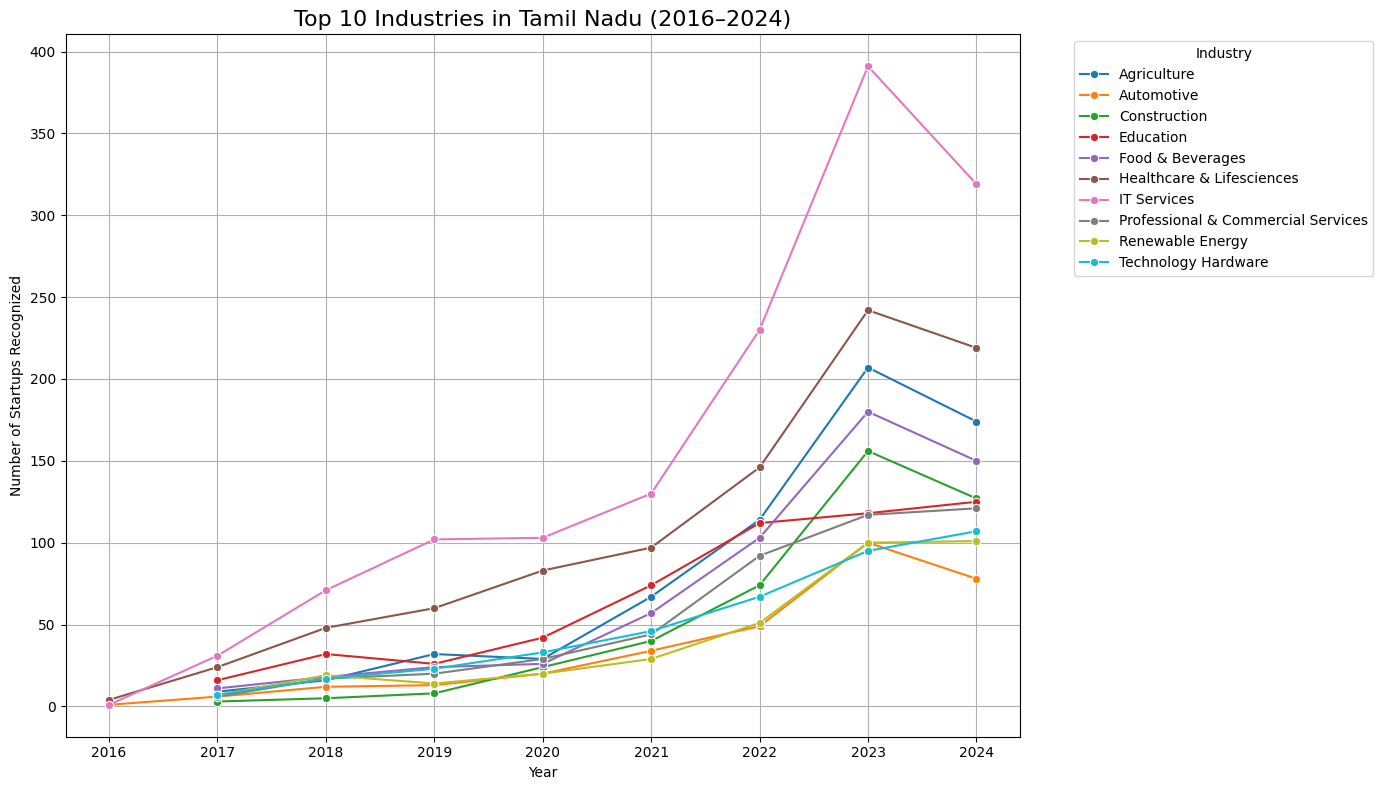

In [16]:
tndf = df[df['state'] == 'Tamil Nadu']
top_industries = (tndf.groupby('industry')['startups_recognized'].sum().nlargest(10).index)
top_industry_data = tndf[tndf['industry'].isin(top_industries)]

grouped = top_industry_data.groupby(['industry', 'year'])['startups_recognized'].sum().reset_index()

plt.figure(figsize=(14, 8))
sns.lineplot(data=grouped, x='year', y='startups_recognized', hue='industry', marker='o')
plt.title('Top 10 Industries in Tamil Nadu (2016–2024)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of Startups Recognized')
plt.xticks(grouped['year'].unique())
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

**Top 10 Industries in Telangana**

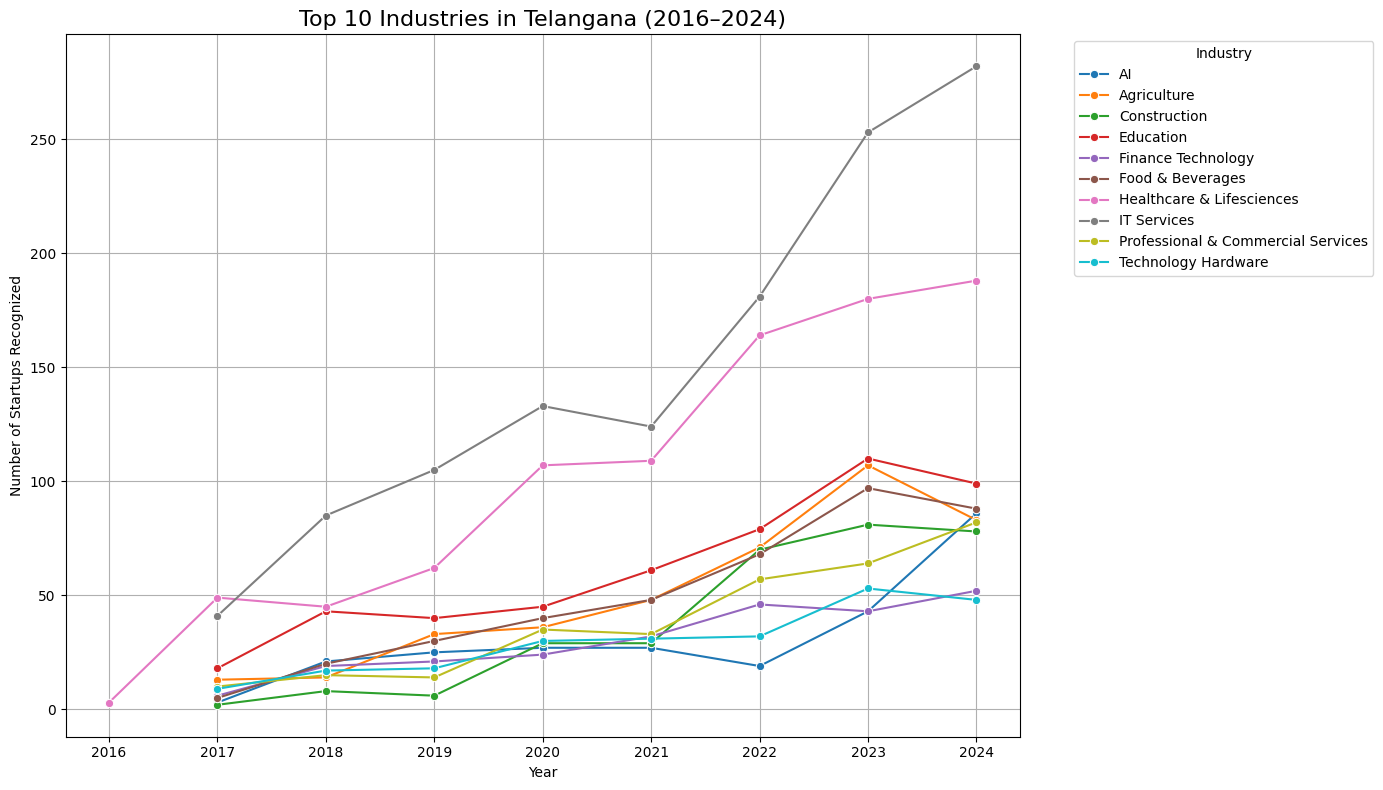

In [17]:
tgdf = df[df['state'] == 'Telangana']
top_industries = (tgdf.groupby('industry')['startups_recognized'].sum().nlargest(10).index)
top_industry_data = tgdf[tgdf['industry'].isin(top_industries)]

grouped = top_industry_data.groupby(['industry', 'year'])['startups_recognized'].sum().reset_index()

plt.figure(figsize=(14, 8))
sns.lineplot(data=grouped, x='year', y='startups_recognized', hue='industry', marker='o')
plt.title('Top 10 Industries in Telangana (2016–2024)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of Startups Recognized')
plt.xticks(grouped['year'].unique())
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

**Top 10 Industries in haryana**

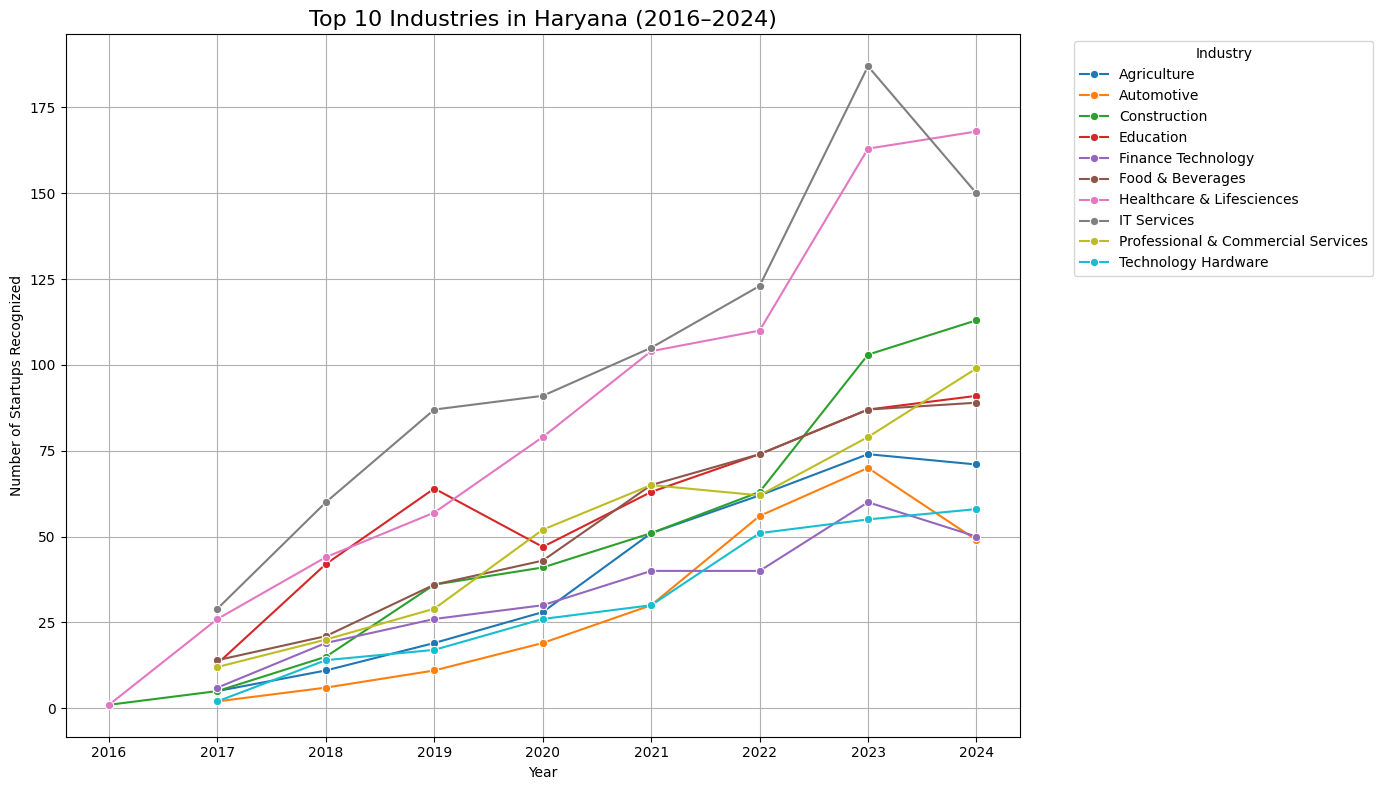

In [18]:
hadf = df[df['state'] == 'Haryana']
top_industries = (hadf.groupby('industry')['startups_recognized'].sum().nlargest(10).index)
top_industry_data = hadf[hadf['industry'].isin(top_industries)]

grouped = top_industry_data.groupby(['industry', 'year'])['startups_recognized'].sum().reset_index()

plt.figure(figsize=(14, 8))
sns.lineplot(data=grouped, x='year', y='startups_recognized', hue='industry', marker='o')
plt.title('Top 10 Industries in Haryana (2016–2024)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of Startups Recognized')
plt.xticks(grouped['year'].unique())
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

**Top 10 Industries in Kerala**

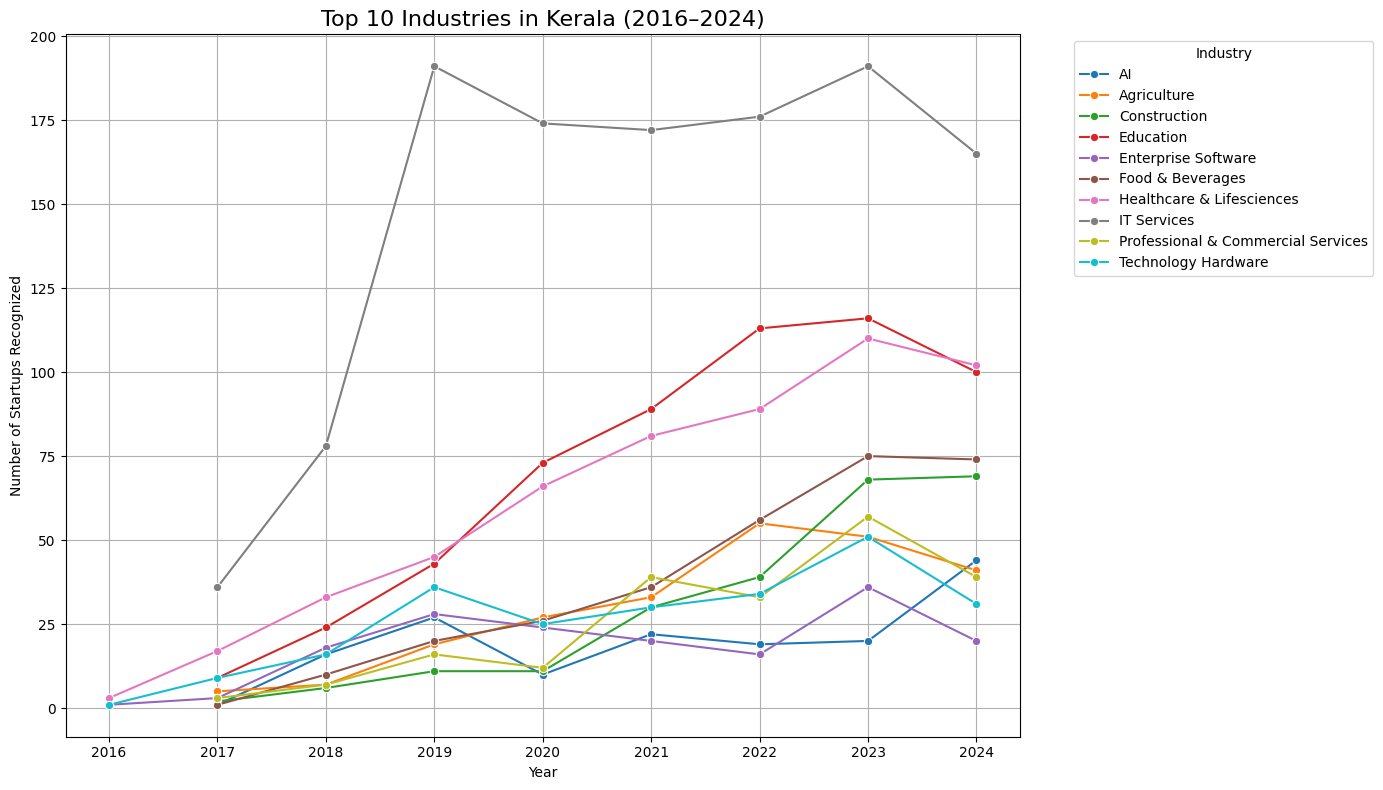

In [19]:
kldf = df[df['state'] == 'Kerala']
top_industries = (kldf.groupby('industry')['startups_recognized'].sum().nlargest(10).index)
top_industry_data = kldf[kldf['industry'].isin(top_industries)]

grouped = top_industry_data.groupby(['industry', 'year'])['startups_recognized'].sum().reset_index()

plt.figure(figsize=(14, 8))
sns.lineplot(data=grouped, x='year', y='startups_recognized', hue='industry', marker='o')
plt.title('Top 10 Industries in Kerala (2016–2024)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of Startups Recognized')
plt.xticks(grouped['year'].unique())
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

Top 10 Industries in Rajasthan

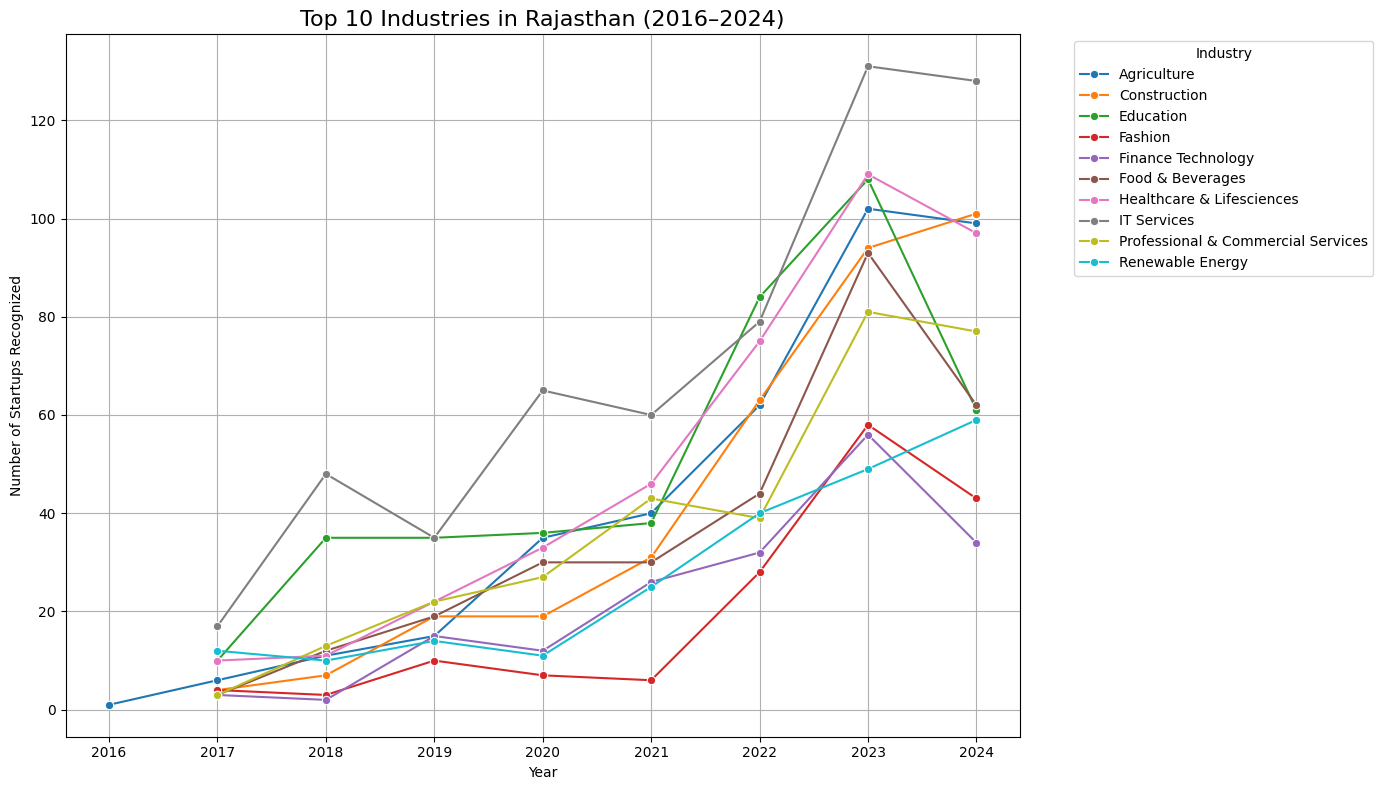

In [20]:
rjdf = df[df['state'] == 'Rajasthan']
top_industries = (rjdf.groupby('industry')['startups_recognized'].sum().nlargest(10).index)
top_industry_data = rjdf[rjdf['industry'].isin(top_industries)]

grouped = top_industry_data.groupby(['industry', 'year'])['startups_recognized'].sum().reset_index()

plt.figure(figsize=(14, 8))
sns.lineplot(data=grouped, x='year', y='startups_recognized', hue='industry', marker='o')
plt.title('Top 10 Industries in Rajasthan (2016–2024)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of Startups Recognized')
plt.xticks(grouped['year'].unique())
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# outlier industries

Detected Outliers:
                      industry  year  startups_recognized    zscore
7                           AI  2024                  924  2.309510
46                   Analytics  2016                    1 -2.321022
234         Internet of Things  2017                  145 -2.087807
275      Non- Renewable Energy  2021                  765  2.071088
286  Other Specialty Retailers  2024                  476  2.079484
375             Social Network  2017                   59 -2.026506


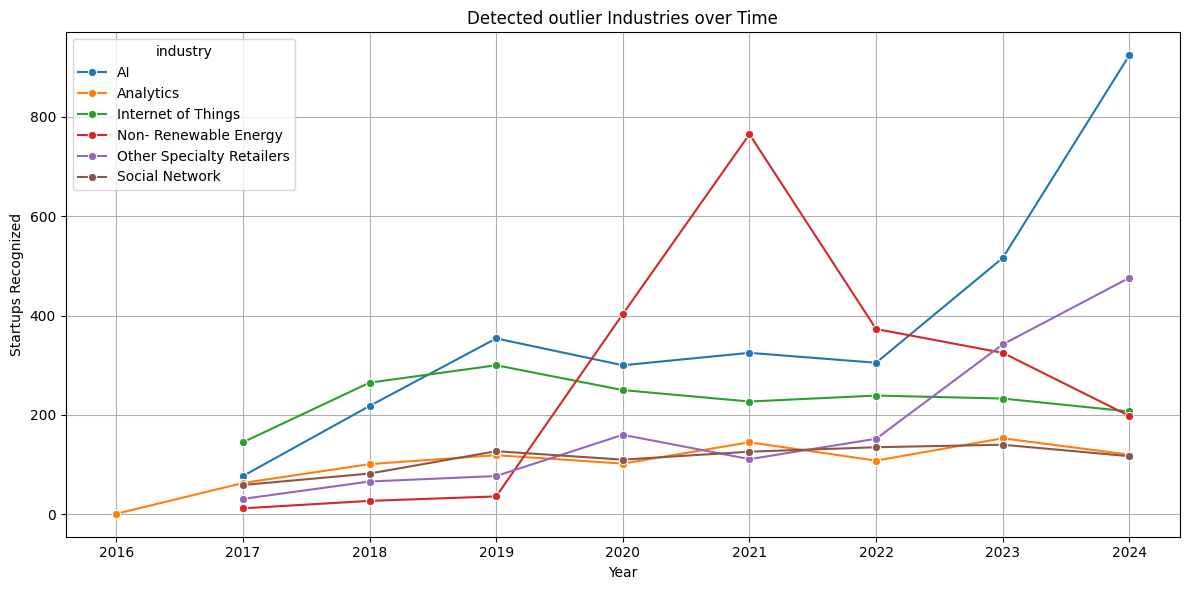

In [21]:
industry_yearly = df.groupby(['industry', 'year'])['startups_recognized'].sum().reset_index()

industry_yearly['zscore'] = industry_yearly.groupby('industry')['startups_recognized'].transform(zscore)

outliers = industry_yearly[(industry_yearly['zscore'].abs() > 2)]
print("Detected Outliers:")
print(outliers[['industry', 'year', 'startups_recognized', 'zscore']])


outlier_industries=['AI','Analytics','Internet of Things','Non- Renewable Energy','Other Specialty Retailers','Social Network']
filtered_df=df[df['industry'].isin(outlier_industries)]
industry_yearly = filtered_df.groupby(['industry','year'])['startups_recognized'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=industry_yearly, x='year', y='startups_recognized', hue='industry', marker='o')
plt.title('Detected outlier Industries over Time')
plt.xlabel('Year')
plt.ylabel('Startups Recognized')
plt.grid(True)
plt.tight_layout()
plt.show()

>*AI startups surged post-2022, alighning with the global generative AI boom, increased VC funding, and adoption across different sectors.*

>*Non-Renewable Energy startups peaked in 2021 amid india's coal shortage and energy security push but declined post 2021 as policies and investments shifted back to renewable energy.*

>*IOT saw strong early growth, but plateaued post 2020 likely due to hardware import challenges and unclear ROI in the indian market.*

>*Other Speciality Retailers  Experienced a sharp rise post-2022, driven by quick commerce, D2C niche brand growth and ONDC-enaabled digital inclusion.*

>*Analytics and social Network startups grew steadily but lacked the breakout trajectory of AI or retail, suggesting more gradual adoption or market saturation.*

# New and Emerging Startup industries

In [38]:
industry_first_year =df.groupby('industry')['year'].min()
industry_total_startups= df.groupby('industry')['startups_recognized'].sum()

industry_summary = pd.DataFrame({'First_appeared' : industry_first_year, 'Total_startups': industry_total_startups})

industry_summary_sorted = industry_summary.sort_values(by='First_appeared', ascending= False)
industry_summary_sorted

,First_appeared,Total_startups
industry,,
Passenger Experience,2021,32
Airport Operations,2020,28
Logistics,2020,876
Biotechnology,2020,587
Toys and Games,2020,491
Waste Management,2019,1327
Advertising,2017,1174
AI,2017,3019
Food & Beverages,2017,8232


In [39]:
industry_yearly = df.groupby(['industry', 'year'])['startups_recognized'].sum().reset_index()
pivot = industry_yearly.pivot(index='industry', columns='year', values='startups_recognized')

def calculate_cagr(row):
    valid_years = row[row > 0].dropna()
    if valid_years.empty or 2024 not in valid_years.index:
        return np.nan
    start_year = valid_years.index[0]
    end_year = 2024
    V_start = valid_years[start_year]
    V_end = row[2024]
    n = end_year - start_year
    if V_start == 0 or n == 0:
        return np.nan
    return ((V_end / V_start) ** (1 / n) - 1) * 100


pivot['CAGR (%)'] = pivot.apply(calculate_cagr, axis=1)

cagr_all = pivot['CAGR (%)'].dropna().sort_values(ascending=False).reset_index()
cagr_all


,industry,CAGR (%)
0,Waste Management,232.597424
1,IT Services,177.712053
2,Agriculture,161.009138
3,Toys and Games,149.095099
4,Construction,143.563385
5,Automotive,128.608489
6,Travel & Tourism,123.651488
7,Green Technology,123.562045
8,Technology Hardware,122.048802
9,Transportation & Storage,116.573677


>*Several industries that emerged in 2019 and beyond are exhibiting excepptionally high growth rates, suggesting strong future potential. Waste management(232%), Toys & Games(149%) and Biotechnology(103%) are standout performers, likely driven by sustainability mandates, digital entertainment shifts, and pandemic-related health innovation respectively. Logistics and Passenger Experience also show robust early-stage momentum, highlighting changing consumer expectations and service digitization.*

# States and Industries Heatmap

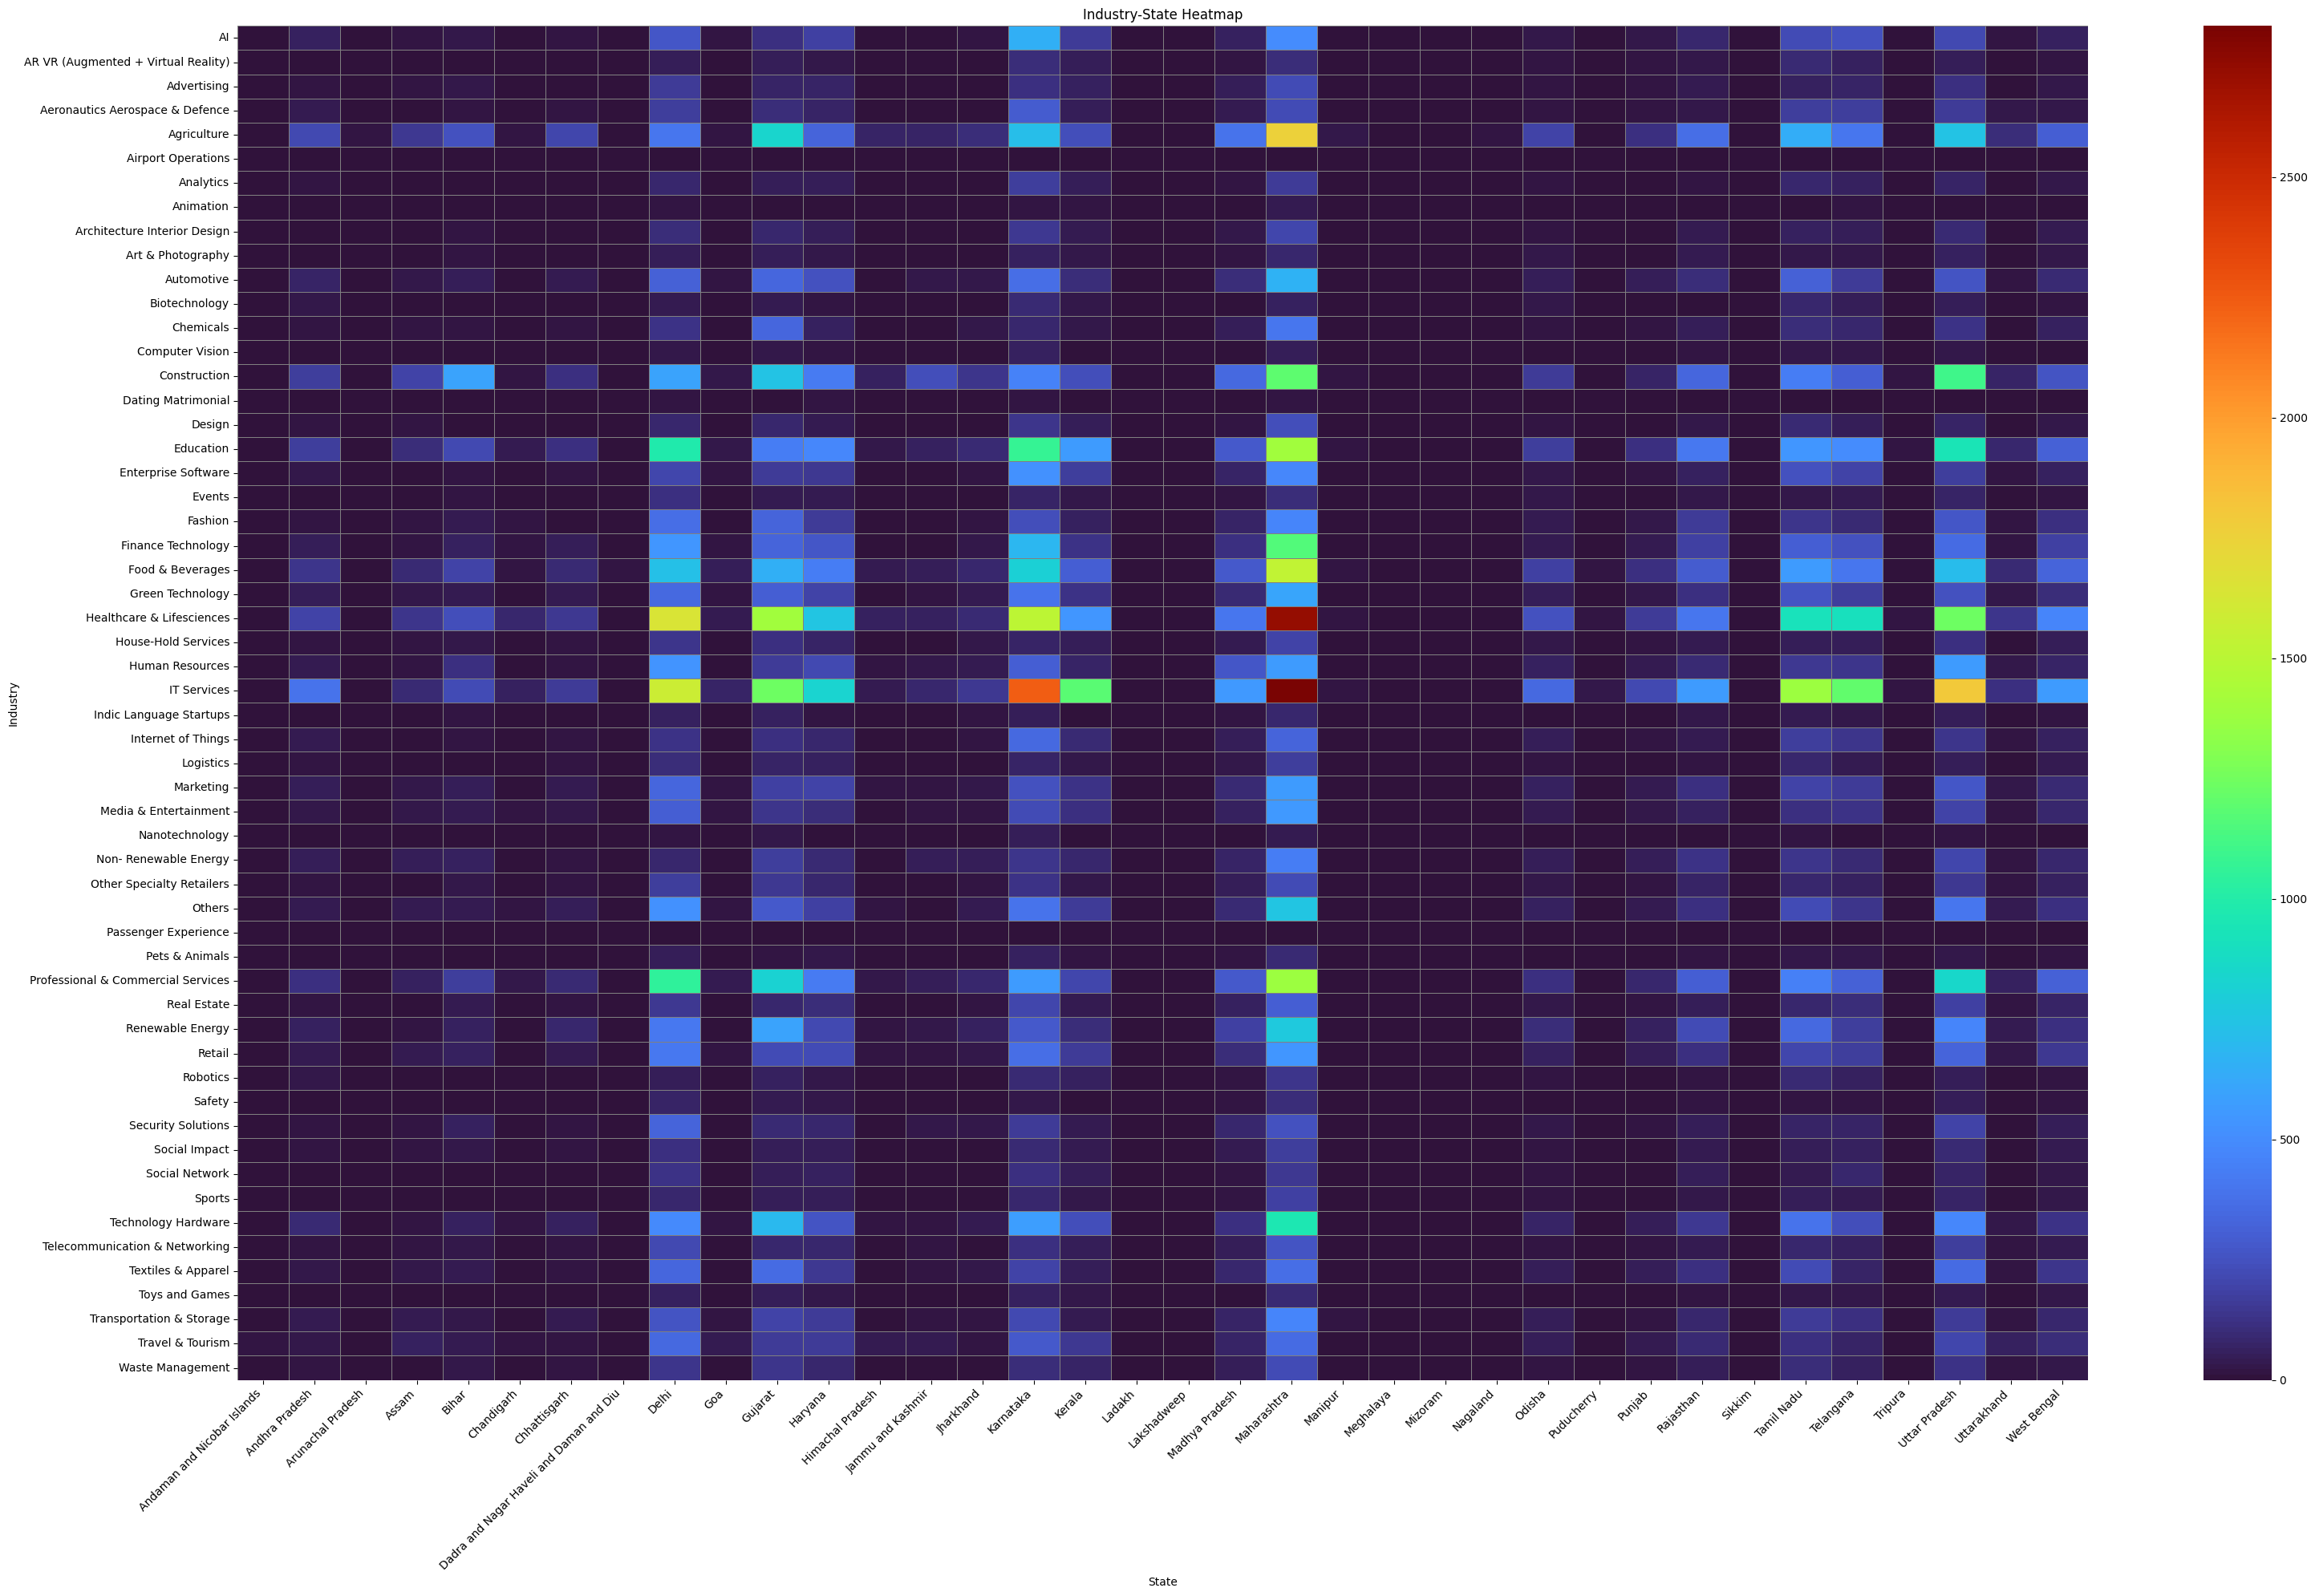

In [24]:
Heatmap_data = df.pivot_table(
    index='industry',
    columns='state',
    values='startups_recognized',
    aggfunc='sum',
    fill_value=0
)

plt.figure(figsize=(32,20))
sns.heatmap(Heatmap_data, cmap='turbo', linewidth=0.7, linecolor='grey')

plt.title('Industry-State Heatmap')
plt.xlabel('State')
plt.ylabel('Industry')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

>*North-Eastern states such as Arunachal Pradesh, Nagaland, Meghalaya, Manipur, Mizoram, Tripura and Sikkim show minimal startup activity, indicating potential for targeted government support, improved infrastructure, and localized startup ecosystem development.*

>*ln contrast, Maharastra, karnataka, Delhi and Telangana Clearly stand out with dense saturation across multiple industries. This is attributed to their will=establishes infrastructure, strong investor networks and tech talent availability that foster diverse entrepreneurial activity.*

# Startup recognition overtime IQR

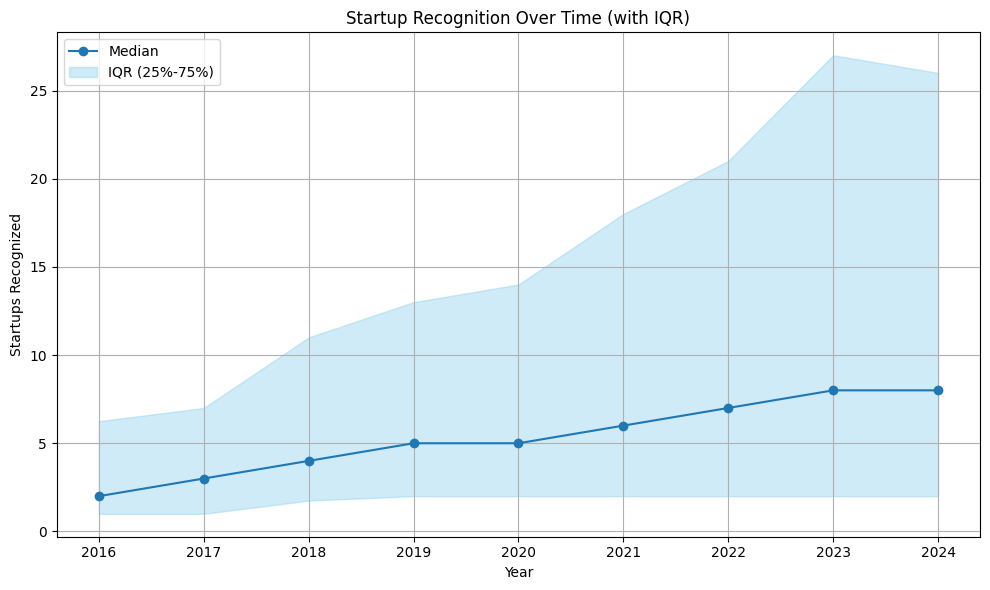

In [25]:
grouped = df.groupby(['year'])['startups_recognized']
median = grouped.median()
q1 = grouped.quantile(0.25)
q3 = grouped.quantile(0.75)

plt.figure(figsize=(10,6))
plt.plot(median.index, median.values, marker='o', label='Median')
plt.fill_between(q1.index, q1.values, q3.values, color='skyblue', alpha=0.4, label='IQR (25%-75%)')
plt.title("Startup Recognition Over Time (with IQR)")
plt.xlabel("Year")
plt.ylabel("Startups Recognized")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


>*From 2016-2024, the median graadually increased, reflecting a steady rise in typical startup activity across the country.*

>*Meanwhile, the IQR expanded significantly, especially post-2020 indicating a rapid increase in diversity and dispersion of startup recognition.*

# Industry Diversity per State

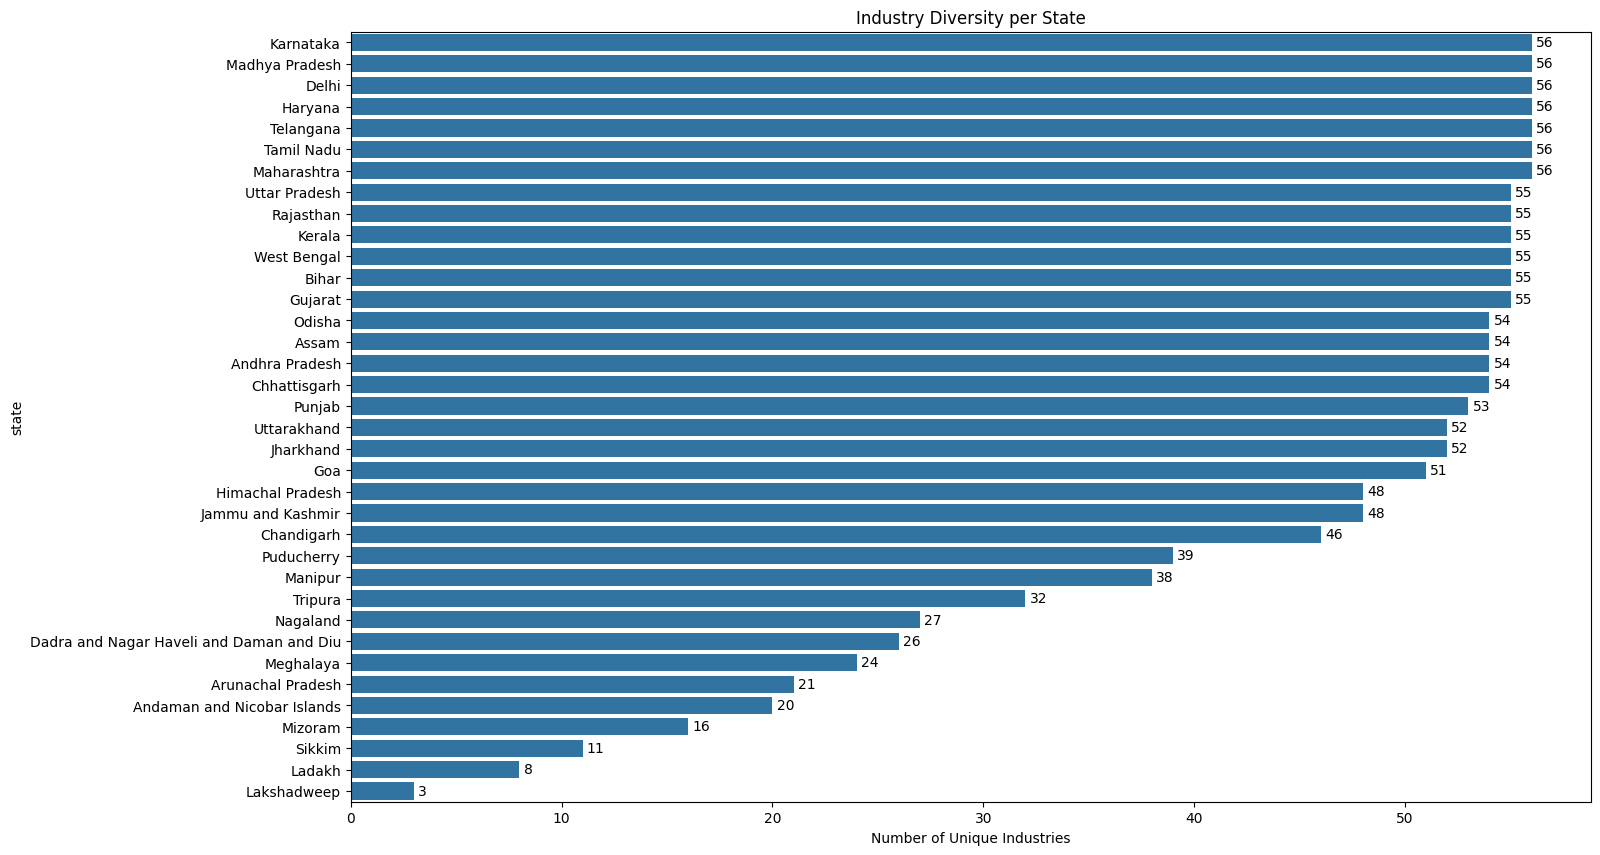

In [27]:
industry_diversity = df.groupby('state')['industry'].nunique().reset_index().sort_values(by='industry', ascending=False)
industry_diversity.columns = ['state', 'unique_industries']

plt.figure(figsize=(16,10))
barplot= sns.barplot( data=industry_diversity, x='unique_industries', y='state')
for i in barplot.containers:
  barplot.bar_label(i, fmt='%d', label_type='edge', padding=3)

plt.title('Industry Diversity per State')
plt.xlabel('Number of Unique Industries')
plt.ylabel('state')
plt.tight_layout
plt.show()


>*Karnataka, Madhya Pradesh, Delhi, Haryana, Telangana, and Tamil Nadu exhibit the highest industry diversity, each hosting startups in all 56 tracked sectors. This reflects the maturity and inclusiveness of their startup ecosystems, where innovation spans from core tech to traditional sectors such as agriculture, retail.*

>*Maharashtra, Uttar Pradesh, Rajasthan, Kerala, and West Bengal follow closely, suggesting strong multi-sectoral participation and balanced development across domains.*

>*In contrast, North Eastern and Union Territory regions such as Sikkim, Mizoram, Arunachal Pradesh, Andaman & Nicobar, Ladakh, and Lakshadweep show significantly lower diversity, with fewer than 25 industries represented — indicating a narrower innovation base.*



# Covid Effect on the startup Trends

In [28]:
df['period'] = pd.cut(df['year'],
                      bins=[2015, 2019, 2021, 2024],
                      labels=['Pre-COVID', 'During COVID', 'Post-COVID'])

# Phase-wise totals
phase_totals = df.groupby(['industry', 'period'])['startups_recognized'].sum().unstack(fill_value=0)

# Growth measures
phase_totals['growth_during'] = phase_totals['During COVID'] - phase_totals['Pre-COVID']
phase_totals['growth_after'] = phase_totals['Post-COVID'] - phase_totals['During COVID']
phase_totals['total_change'] = phase_totals['Post-COVID'] - phase_totals['Pre-COVID']

# Categorize industries
collapsed = phase_totals[(phase_totals['growth_during'] < 0) & (phase_totals['growth_after'] <= 0)]
recovered = phase_totals[(phase_totals['growth_during'] < 0) & (phase_totals['growth_after'] > 0)]
surged = phase_totals[(phase_totals['growth_during'] > 0) & (phase_totals['growth_after'] > 0)]

print("\n Collapsed Industries:\n", collapsed[['Pre-COVID', 'During COVID', 'Post-COVID']])
print("\n Recovered Industries:\n", recovered[['Pre-COVID', 'During COVID', 'Post-COVID']])
print("\n Surged Industries:\n", surged[['Pre-COVID', 'During COVID', 'Post-COVID']])



 Collapsed Industries:
 Empty DataFrame
Columns: [Pre-COVID, During COVID, Post-COVID]
Index: []

 Recovered Industries:
 period                               Pre-COVID  During COVID  Post-COVID
industry                                                                
AI                                         649           625        1745
AR VR (Augmented + Virtual Reality)        200           149         350
Advertising                                260           239         675
Analytics                                  284           247         381
Animation                                   31            28         100
Art & Photography                          106            93         363
Computer Vision                            101            95         122
Design                                     255           235         497
Enterprise Software                        735           563        1355
Green Technology                           812           681        1809
I

/tmp/ipython-input-28-862836695.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  phase_totals = df.groupby(['industry', 'period'])['startups_recognized'].sum().unstack(fill_value=0)


>*No major industries collapsed post-COVID, most have either recoverd or surged.*

>*industries like AI, Waste Management,Biotech, Logistics and Toys &games are showing high momentum.*

>*These trends suggest shifting innovation focus in post-pandemic india towards sustainability, health, automation and digital infrastructure.*

# Summary

**Key Takeaways – Indian Startup Ecosystem (2016–2024)**


**-Industry Leaders:**
*IT Services and Healthcare & Lifesciences consistently dominated in startup recognitions across the years.*

**-Emerging Sectors:**
*Post-2022 saw surges in Agriculture, Consumer Services, and Food & Beverages, indicating growing rural and consumer-focused innovation.*

**-COVID-19 Impact:**
*No major industry collapsed post-COVID.*
*Sectors like AI, Biotech, Waste Management, Toys & Games, and Logistics showed strong post-pandemic growth.*

**-State-Level Trends:**
*Maharashtra, Karnataka, Delhi, and Tamil Nadu are the top contributors, showing both volume and diversity of industries.*
*North-Eastern states and Union Territories showed limited industry spread, signaling potential for future policy focus.*

**-High-Growth Industries (by CAGR):**
*Waste Management, IT Services, Agriculture, and Toys & Games had the highest compound growth rates — reflecting future-ready, scalable sectors.*

**-Low-Growth Sectors:**
*Some traditional sectors like Stationery, Printing, and Leather showed stagnation or decline, hinting at digital shift.*

**-Recovery Patterns:**
*Most industries hit during COVID recovered strongly, especially in health-tech, logistics, and remote service industries.*

**-Strategic Insight:**
*India's startup growth is diversifying across sectors and geographies — policy and investment should target underserved regions and high-CAGR sectors.*